# Code to generate plots for Section 3

### Zhaoqi Li

Load required packages: 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [20]:
def read_files(alpha_lst, scene_typ_lst, arggs):
    dat_lst = list()
    for scene_typ in scene_typ_lst:
        if scene_typ == "nonunique":
            method_typ_lst = ["mb", "naive_nonunique"]
        else:
            method_typ_lst = ["mb", "naive_unique"]
        for method_typ in method_typ_lst:
            dat = pd.read_csv("{}/alpha={}_method_{}_scene_{}.csv".format(arggs, alpha_lst, method_typ, scene_typ))
            dat["scenario"] = scene_typ
            if method_typ == "naive_nonunique" or method_typ == "naive_unique":
                dat["method"] = "two-stage"
            else:
                dat["method"] = "joint"
            dat_lst.append(dat)
    for scene_typ in scene_typ_lst:
        dat = pd.read_csv("{}/os_oracle_alpha={}_scene_{}.csv".format(arggs, alpha, scene_typ))
        dat["scenario"] = scene_typ
        dat["method"] = "os"
        dat_lst.append(dat)
    return dat_lst

def read_os_oracle_info(alpha_lst, scene_typ_lst, arggs):
    dat_lst = list()
    for scene_typ in scene_typ_lst:
        dat = pd.read_csv("{}/os_oracle_alpha={}_scene_{}.csv".format(arggs, alpha, scene_typ))
        dat["scenario"] = scene_typ
        dat["method"] = "os"
        dat_lst.append(dat)
    return dat_lst

## 2. CI widths for three scenarios

We use $\alpha=0.05$ for all three scenarios and below shows the results: 

In [29]:
alpha=0.05
scene_typ_lst = ["nonunique", "unique_noncorr", "unique_corr"]
dat_lst = read_files(alpha, scene_typ_lst, "sim_data_4")

dat = pd.DataFrame()
for i in range(len(dat_lst)):
    dat = pd.concat([dat, dat_lst[i]])

In [30]:
dat

,Unnamed: 0,alpha,coverage,width,policy coverage,coverage_unif,width_unif,len_pi_hat,scenario,method,os coverage,os width,oracle coverage,oracle width
0,0,0.05,0.000,0.085066,1.0,1.000,1.060860,258.207,nonunique,joint,NaN,NaN,NaN,NaN
0,0,0.05,0.000,0.083286,1.0,1.000,1.091445,273.013,nonunique,two-stage,NaN,NaN,NaN,NaN
0,0,0.05,0.983,0.035923,1.0,0.983,0.035923,162.679,unique_noncorr,joint,NaN,NaN,NaN,NaN
0,0,0.05,0.989,0.039751,1.0,0.989,0.039753,176.935,unique_noncorr,two-stage,NaN,NaN,NaN,NaN
0,0,0.05,0.986,0.035379,1.0,0.986,0.098678,163.497,unique_corr,joint,NaN,NaN,NaN,NaN
0,0,0.05,0.981,0.034892,1.0,0.981,0.105213,176.935,unique_corr,two-stage,NaN,NaN,NaN,NaN
0,0,0.05,NaN,NaN,NaN,NaN,NaN,NaN,nonunique,os,0.000,0.060533,0.954,0.460262
0,0,0.05,NaN,NaN,NaN,NaN,NaN,NaN,unique_noncorr,os,0.946,0.023428,0.958,0.023290
0,0,0.05,NaN,NaN,NaN,NaN,NaN,NaN,unique_corr,os,0.810,0.016612,0.950,0.016428


In [31]:
dat["method"] = ["joint", "two-stage", "joint", "two-stage", "joint", "two-stage", "one-step", "one-step","one-step"]

In [32]:
dat_lst_os = read_os_oracle_info(alpha_lst, scene_typ_lst, "sim_data")
dat_os = pd.DataFrame()
for i in range(len(dat_lst_os)):
    dat_os = pd.concat([dat_os, dat_lst_os[i]])

In [33]:
dat_width = pd.DataFrame()
coverage_arr = np.concatenate([np.array(dat["coverage_unif"])[0:6], np.array(dat["os coverage"])[6:9]])
dat_width["coverage"] = coverage_arr.flatten()
dat_width["scenario"] = np.array(dat["scenario"])
dat_width["method"] = np.array(dat["method"])
width_arr = np.concatenate([np.array(dat["width_unif"])[0:2], np.array(dat["width"])[2:6], np.array(dat["os width"])[6:9]])
dat_width["width"] = width_arr.flatten()

In [34]:
dat_width

,coverage,scenario,method,width
0,1.000,nonunique,joint,1.060860
1,1.000,nonunique,two-stage,1.091445
2,0.983,unique_noncorr,joint,0.035923
3,0.989,unique_noncorr,two-stage,0.039751
4,0.986,unique_corr,joint,0.035379
5,0.981,unique_corr,two-stage,0.034892
6,0.000,nonunique,one-step,0.060533
7,0.946,unique_noncorr,one-step,0.023428
8,0.810,unique_corr,one-step,0.016612


In [35]:
dat_os_s = dat_os[["oracle coverage", "oracle width", "scenario"]]
dat_width_joint = pd.merge(dat_width, dat_os_s, how="left", on="scenario")
dat_width_joint["rel_width"] = dat_width_joint["width"] / dat_width_joint["oracle width"]

In [36]:
dat_width_joint

,coverage,scenario,method,width,oracle coverage,oracle width,rel_width
0,1.000,nonunique,joint,1.060860,1.0,0.892947,1.188043
1,1.000,nonunique,two-stage,1.091445,1.0,0.892947,1.222294
2,0.983,unique_noncorr,joint,0.035923,1.0,0.119095,0.301636
3,0.989,unique_noncorr,two-stage,0.039751,1.0,0.119095,0.333776
4,0.986,unique_corr,joint,0.035379,1.0,0.107799,0.328195
5,0.981,unique_corr,two-stage,0.034892,1.0,0.107799,0.323683
6,0.000,nonunique,one-step,0.060533,1.0,0.892947,0.067790
7,0.946,unique_noncorr,one-step,0.023428,1.0,0.119095,0.196717
8,0.810,unique_corr,one-step,0.016612,1.0,0.107799,0.154103


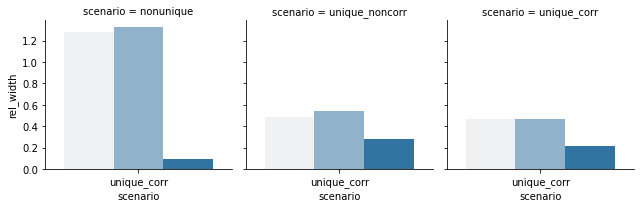

In [18]:
g = sns.FacetGrid(dat_width_joint, col="scenario")
g.map_dataframe(sns.barplot, x="scenario", y="rel_width", hue="method")

<Axes: xlabel='scenario', ylabel='rel_width'>

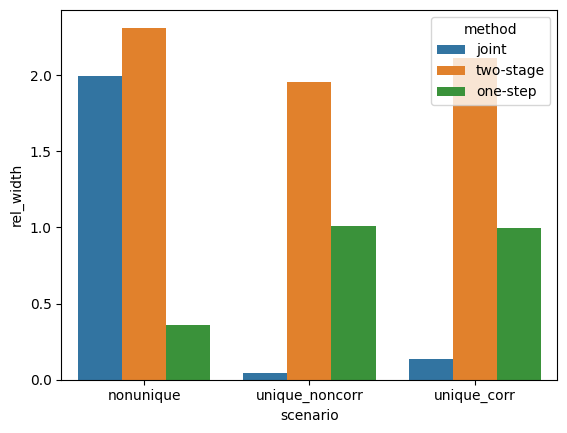

In [25]:
sns.barplot(x="scenario", y="rel_width", hue="method", data=dat_width_joint)

<AxesSubplot:xlabel='scenario', ylabel='rel_width'>

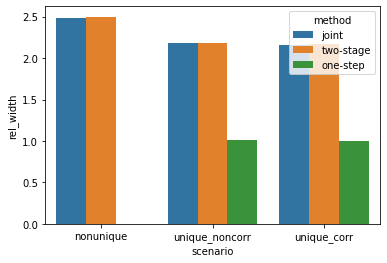

In [21]:
sns.barplot(x="scenario", y="rel_width", hue="method", data=dat_width_joint)

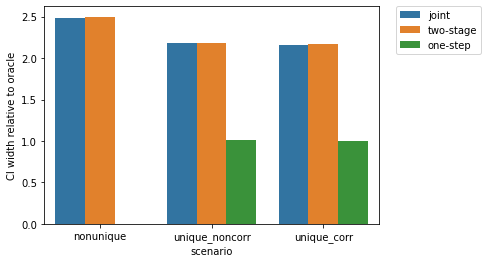

In [22]:
#sns.set(rc={"figure.figsize":(8, 6)}) #width=8, height=4
#sns.set(font_scale=0.8)
ax = sns.barplot(x="scenario", y="rel_width", hue="method", data=dat_width_joint)
ax.set(xlabel='scenario', ylabel='CI width relative to oracle')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

## 3. Add high-dimensional results

In [185]:
# preliminary results
CI_high_dim = [0.103632188882977, 0.09396314308572905, 0.07138447083102573]
method_typ_high_dim = ["two-stage", "joint", "os"]
#dic_CI = {"two-stage": 0.103632188882977, "mb": 0.0993137561714581, "oracle": 0.07138447083102573}
dat_high_dim = pd.DataFrame({"method": method_typ_high_dim, "width": CI_high_dim})

In [186]:
dat_high_dim

,method,width
0,two-stage,0.103632
1,joint,0.093963
2,os,0.071384


In [187]:
dat_high_dim["rel_width"] = dat_high_dim["width"] / 0.07138447083102573

In [190]:
# add remaining columns
dat_high_dim["coverage"] = [1.0, 0.98, 1.0]
dat_high_dim["scenario"] = ["high_dim", "high_dim", "high_dim"]

In [191]:
dat_high_dim

,method,width,rel_width,coverage,scenario
0,two-stage,0.103632,1.451747,1.00,high_dim
1,joint,0.093963,1.316297,0.98,high_dim
2,os,0.071384,1.000000,1.00,high_dim


In [192]:
dat_high_dim_joint = pd.concat([dat_width_joint, dat_high_dim])

In [193]:
dat_high_dim_joint

,coverage,scenario,method,width,oracle coverage,oracle width,rel_width
0,1.000,nonunique,joint,1.327191,0.953,0.534413,2.483454
1,1.000,nonunique,two-stage,1.334796,0.953,0.534413,2.497685
2,0.980,unique_noncorr,joint,0.079964,0.944,0.036704,2.178606
3,0.980,unique_noncorr,two-stage,0.080128,0.944,0.036704,2.183058
4,0.981,unique_corr,joint,0.073585,0.943,0.034033,2.162163
5,0.978,unique_corr,two-stage,0.073660,0.943,0.034033,2.164362
6,0.000,nonunique,os,0.133600,0.953,0.534413,0.249995
7,0.815,unique_noncorr,os,0.037080,0.944,0.036704,1.010228
8,0.949,unique_corr,os,0.034073,0.943,0.034033,1.001165
0,1.000,high_dim,two-stage,0.103632,NaN,NaN,1.451747


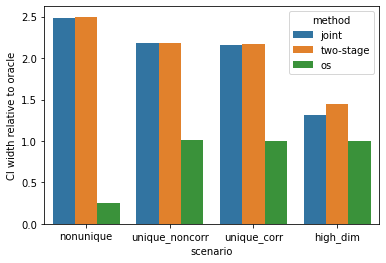

In [194]:
ax = sns.barplot(x="scenario", y="rel_width", hue="method", data=dat_high_dim_joint)
ax.set(xlabel='scenario', ylabel='CI width relative to oracle')
plt.show()